In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [ ]:
from logging import getLogRecordFactory
# Read in the image
image = mpimg.imread('/content/MONEDA3.jpeg')
# convert image a gray scale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#apply Gausianblur (eliminate text in coins)
blur = cv2.GaussianBlur(gray,(15,15),0,0)
#apply threshold
contorno1,th1 = cv2.threshold(blur, 175, 255, cv2.THRESH_BINARY_INV)
# create a kernel and apply erode
s = np.ones((5,5),np.uint8)
th1 = cv2.erode(th1,s, iterations = 1)
#find edges
cannyedge = cv2.Canny(th1,120,255)

3 9 9 7 1 2
25.6


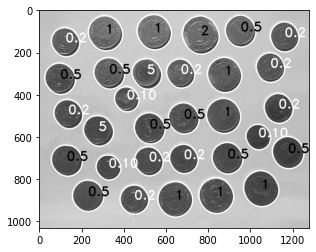

In [ ]:
#find contourns
contornos, hip = cv2.findContours(th1,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#draw contourns
salida = cv2.drawContours(gray,contornos,-1,(255,0,0),5)
#count bolivianos
bolivianos = 0

for i in contornos:
  #find center of contourns
  M = cv2.moments(i)
  cX = int(M["m10"] / M["m00"])
  cY = int(M["m01"] / M["m00"])
  #calculate the areas
  areas = cv2.contourArea(i)//100
  #apply ranges for areas
  if areas <= 111:
    cv2.putText(gray, '0.10 ', (cX,cY),2,2,(255,255,255),3) #write a text with value
    bolivianos = bolivianos + 0.1                           #sum values
  if 111 <= areas <  151:
    cv2.putText(gray, '0.2', (cX,cY),2,2,(255,255,0),3)
    bolivianos = bolivianos + 0.2
  if 151 <= areas < 160:
    cv2.putText(gray, '5', (cX,cY),2,2,(255,0,0),3)
    bolivianos = bolivianos + 5
  if 160 <= areas < 200:
    cv2.putText(gray, '0.5', (cX,cY),2,2,(0,255,0),3)
    bolivianos = bolivianos + 0.5
  if 200 <= areas < 230:
    cv2.putText(gray, '1', (cX,cY),2,2,(0,255,255),3)
    bolivianos = bolivianos + 1
  if areas >= 230:
    cv2.putText(gray, '2', (cX,cY),2,2,(0,0,255),3)
    bolivianos = bolivianos + 2
#show totalbs
print(bolivianos/10)
plt.imshow(gray,cmap='gray')